<img src='https://storage.googleapis.com/kaggle-datasets-images/228/482/a520351269b547c89afe790820a1087e/dataset-cover.jpeg'>
* ref : kaggle  : https://www.kaggle.com/uciml/pima-indians-diabetes-database
    
    

In [28]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [29]:
#--------------------NN
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

sns.set()

In [30]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/csv_data/pima/diabetes.csv")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


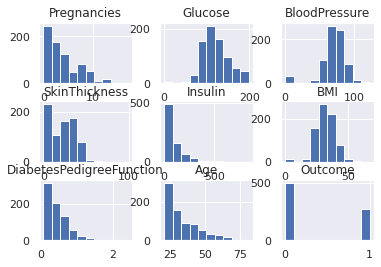

In [31]:
df.hist()
plt.show()

# 가공은 머신러닝과 동일하게 진행하면 된다

# NN
### 랜덤시드 고정

In [32]:
np.random.seed(1414)
tf.random.set_seed(1414)

X,y(학습 피쳐, 타겟)분리

In [33]:
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)

# 모델

In [36]:
# model= decesionTree() -------- M.L xxxxxxxx
model = Sequential()
model.add(Dense(units=10, activation="relu", input_dim=8)) # input_dim == shape 피쳐갯수 (506,9)
model.add(Dense(units=8, activation="relu"))
model.add(Dense(units=4, activation="relu"))
model.add(Dense(units=1, activation="sigmoid"))
#adam=momentom+adaboost))
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
#l,o,m


### 8:2 데이터 나누기 +  학습(fit)
* initial_epoch = 0,
* steps_per_epoch = None,
* validation_steps = None,
* validation_batch_size = None,

In [37]:
X_train,X_val,y_train,y_val = train_test_split(X,y, test_size=0.2)
# model.fit(X_train,y_train,validation_data=(X_val,y_val),batch_size=10,epochs=100,shuffle=True)

### callback  (EarlyStopping, CheckPoint)
* EarlyStopping : 오버피팅 시 학습 중단
* CheckPoint : epoch 수행 후 점수가 좋아지면 해당 모델을 저장

In [39]:
stopping = EarlyStopping(monitor="val_loss",patience=10)
#os.path
import os

model_dir= "/content/drive/MyDrive/Colab Notebooks/포트폴리오/nural network/save_models/"
if not os.path.exists(model_dir):
    print("path error~!!!!")
else:
    print("path ok~!!!!")

model_path = "/content/drive/MyDrive/Colab Notebooks/포트폴리오/nural network/save_models/{epoch:03d}_{val_loss:4f}.hdf5"
checkpoint = ModelCheckpoint(model_path,monitor="val_loss",save_best_only=True,period=1)

path ok~!!!!


# 학습시작

In [40]:
# ----------------- 나누기
history = model.fit(X_train,y_train,validation_data=(X_val, y_val),batch_size=10,epochs=100, shuffle=True,
          callbacks=[stopping,checkpoint]
          )
# model.fit(X, y, validation_split=0.2, validation_data=(X_val,y_val), batch_size=10, epochs=100 )   #callbacks

Epoch 1/100
62/62 [==============================] - 1s 5ms/step - loss: 4.7010 - accuracy: 0.4023 - val_loss: 1.5636 - val_accuracy: 0.5195
Epoch 2/100
62/62 [==============================] - 0s 2ms/step - loss: 1.1590 - accuracy: 0.5244 - val_loss: 0.8214 - val_accuracy: 0.5649
Epoch 3/100
62/62 [==============================] - 0s 2ms/step - loss: 0.7805 - accuracy: 0.6221 - val_loss: 0.7515 - val_accuracy: 0.5779
Epoch 4/100
62/62 [==============================] - 0s 2ms/step - loss: 0.7098 - accuracy: 0.6694 - val_loss: 0.7001 - val_accuracy: 0.6039
Epoch 5/100
62/62 [==============================] - 0s 2ms/step - loss: 0.6768 - accuracy: 0.6922 - val_loss: 0.7699 - val_accuracy: 0.6039
Epoch 6/100
62/62 [==============================] - 0s 2ms/step - loss: 0.6638 - accuracy: 0.6629 - val_loss: 0.6792 - val_accuracy: 0.6104
Epoch 7/100
62/62 [==============================] - 0s 2ms/step - loss: 0.6541 - accuracy: 0.6759 - val_loss: 0.7065 - val_accuracy: 0.6039
Epoch 8/100
6

In [41]:
# Callback (EarlyStopping(monitor))

# 점수확인

In [42]:
train_loss= history.history ["loss"]
print(train_loss)

[4.7010273933410645, 1.1590209007263184, 0.7805415987968445, 0.7098021507263184, 0.6767604947090149, 0.6638149619102478, 0.6541069149971008, 0.6474921703338623, 0.647169291973114, 0.638217031955719, 0.6340727806091309, 0.6350764036178589, 0.6328088045120239, 0.6185547709465027, 0.6161555647850037, 0.6066657900810242, 0.6077576875686646, 0.6047069430351257, 0.5929882526397705, 0.5991305708885193, 0.5904815196990967, 0.5856008529663086, 0.5837758779525757, 0.5830639004707336, 0.584861159324646, 0.5831928849220276, 0.6039244532585144, 0.5964446663856506, 0.582057774066925, 0.5677865743637085, 0.5789628624916077, 0.5852540731430054, 0.5662230849266052, 0.5799058675765991, 0.5788347125053406, 0.5846322178840637, 0.5736885666847229, 0.5697235465049744, 0.5660459399223328, 0.5642352104187012, 0.5642441511154175, 0.5647087693214417, 0.5670932531356812, 0.5606869459152222, 0.5539981126785278, 0.5533765554428101, 0.5513336658477783, 0.5555922389030457, 0.567634105682373, 0.555312991142273, 0.546

In [43]:
val_loss = history. history["val_loss"]
print(val_loss)

[1.5636430978775024, 0.8213501572608948, 0.7515206336975098, 0.7000866532325745, 0.7698838114738464, 0.6791806221008301, 0.7065134644508362, 0.6731204986572266, 0.7111433148384094, 0.6661988496780396, 0.6584146022796631, 0.6952459216117859, 0.6537836790084839, 0.6553953886032104, 0.6600770950317383, 0.6556276082992554, 0.6468498706817627, 0.7300893068313599, 0.6419805288314819, 0.6554680466651917, 0.6988962292671204, 0.6410382390022278, 0.6864777207374573, 0.6401832103729248, 0.7205941081047058, 0.6304463148117065, 0.6894201040267944, 0.6403751373291016, 0.686631977558136, 0.6192908883094788, 0.6302747130393982, 0.637805163860321, 0.692751407623291, 0.6605265140533447, 0.6586946249008179, 0.6865898966789246, 0.7078186869621277, 0.6074272990226746, 0.6006941795349121, 0.6460659503936768, 0.602492094039917, 0.6287674307823181, 0.6515393257141113, 0.5956807136535645, 0.6031187176704407, 0.5985258221626282, 0.6080795526504517, 0.6283625364303589, 0.6535430550575256, 0.6226116418838501, 0.7

In [44]:
score = model.evaluate(X_val, y_val)
print(score)

5/5 [==============================] - 0s 2ms/step - loss: 0.6517 - accuracy: 0.6429
[0.6517179608345032, 0.6428571343421936]


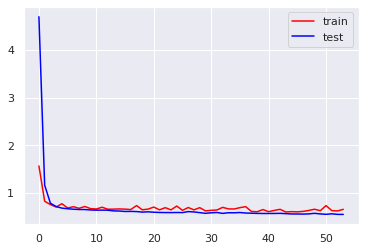

In [46]:
plt.plot(np.arange(len(val_loss)), val_loss, c="red", label="train")
plt.plot(np.arange(len(val_loss)), train_loss,c="blue",label="test")
plt.legend()
plt.show()